# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [31]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### 1. Load the dataset

In [32]:
# Load files into a pandas dataframe
train = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Train.csv')
test = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
#ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/VariableDefinitions.csv')

In [33]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [34]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [35]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



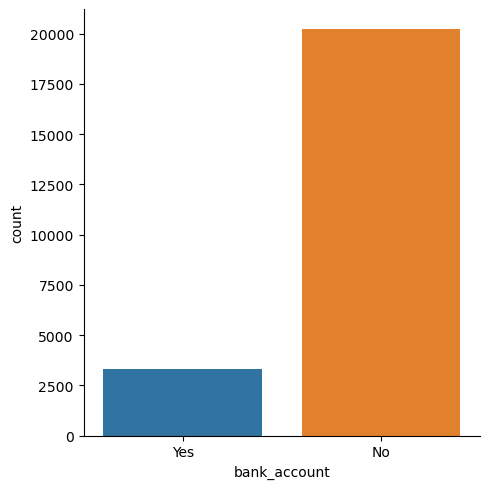

In [36]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [37]:
# view the submission file
ss.head()

NameError: name 'ss' is not defined

### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [38]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [39]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

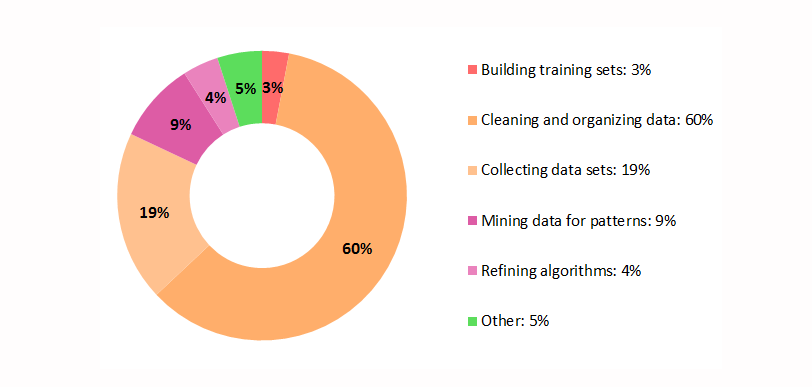

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


In [40]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account','uniqueid'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


The target values have been transformed into numerical datatypes, **1** represents **‘Yes’** and **0** represents **‘No’**.

We have created a simple preprocessing function to:

*   Handle conversion of data types
*   Convert categorical features to numerical features by using [One-hot Encoder and Label Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
*   Drop uniqueid variable
*   Perform [feature scaling](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9).

The processing function will be used for both train and test independent variables.

In [41]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    #data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    data['relationship_with_head']=data['relationship_with_head'].replace({'Head of Household':0,'Spouse':1,'Child':2,'Parent':3,'Other relative':4,'Other non-relatives':5})
    data['marital_status']=data['marital_status'].replace({'Married/Living together':0,'Single/Never Married':1,'Widowed':2,'Divorced/Seperated':3,'Dont know':4})
    data['education_level']=data['education_level'].replace({'Primary education':0,'No formal education':1,'Secondary education':2,'Tertiary education':3,'Vocational/Specialised training':4,'Other/Dont know/RTA':5})
    data['job_type']=data['job_type'].replace({'Self employed':0,'Informally employed':1,'Farming and Fishing':2,'Remittance Dependent':3,'Other Income':4,'Formally employed Private':5,'No Income':6,'Formally employed Government':7,'Government Dependent':8,'Dont Know/Refuse to answer':9})
    data['country']=data['country'].replace({'Rwanda':0,'Tanzania':1,'Kenya':2,'Uganda':3})

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    #data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

Preprocess both train and test dataset.

In [44]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
test_id=test['uniqueid']
test = test.drop(['uniqueid'], axis=1)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [45]:
# the first train row
print(processed_train[:1])

[[0.66666667 1.         0.         1.         0.1        0.0952381
  0.         0.2        0.         0.4        0.        ]]


Observe the shape of the train data.

In [46]:
# shape of the processed train set
print(processed_train.shape)

(23524, 11)


Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

###4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [47]:
import sklearn.model_selection

In [48]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.2, random_state=42)

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

In [49]:
from catboost import CatBoostClassifier

# Create CatBoost classifier model
cat_model = CatBoostClassifier()

# Fit the model to the training data
cat_model.fit(X_Train, y_Train)


Learning rate set to 0.036073
0:	learn: 0.6600430	total: 7.03ms	remaining: 7.02s
1:	learn: 0.6299437	total: 14.2ms	remaining: 7.08s
2:	learn: 0.5984427	total: 21.2ms	remaining: 7.04s
3:	learn: 0.5726148	total: 28.1ms	remaining: 6.99s
4:	learn: 0.5504492	total: 35.7ms	remaining: 7.11s
5:	learn: 0.5266951	total: 42.7ms	remaining: 7.07s
6:	learn: 0.5074326	total: 49.2ms	remaining: 6.98s
7:	learn: 0.4928848	total: 54.1ms	remaining: 6.71s
8:	learn: 0.4760380	total: 61.5ms	remaining: 6.77s
9:	learn: 0.4650678	total: 66.5ms	remaining: 6.59s
10:	learn: 0.4515839	total: 74.2ms	remaining: 6.67s
11:	learn: 0.4402021	total: 81.5ms	remaining: 6.71s
12:	learn: 0.4297268	total: 88.4ms	remaining: 6.71s
13:	learn: 0.4194143	total: 95.6ms	remaining: 6.73s
14:	learn: 0.4091709	total: 103ms	remaining: 6.74s
15:	learn: 0.3988762	total: 110ms	remaining: 6.79s
16:	learn: 0.3899134	total: 118ms	remaining: 6.82s
17:	learn: 0.3827700	total: 125ms	remaining: 6.8s
18:	learn: 0.3780281	total: 129ms	remaining: 6.67

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [50]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
cat_model_y = cat_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, cat_model_y))

Error rate of XGB classifier:  0.11243358129649306


Let’s check the confusion matrix for XGB model.

In [51]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like. 

In [52]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {
    'depth': [3, 5, 7],  # Different depth values to try
    'learning_rate': [0.1, 0.01, 0.001],  # Different learning rate values to try
    'iterations': [100, 200, 300]  # Different number of iterations to try
}
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)


0:	learn: 0.6364554	total: 2.1ms	remaining: 207ms
1:	learn: 0.5888228	total: 4.26ms	remaining: 209ms
2:	learn: 0.5496312	total: 5.99ms	remaining: 194ms
3:	learn: 0.5127339	total: 7.45ms	remaining: 179ms
4:	learn: 0.4851995	total: 8.99ms	remaining: 171ms
5:	learn: 0.4607249	total: 10.7ms	remaining: 167ms
6:	learn: 0.4397687	total: 12.3ms	remaining: 164ms
7:	learn: 0.4222227	total: 14ms	remaining: 161ms
8:	learn: 0.4037036	total: 15.5ms	remaining: 157ms
9:	learn: 0.3899202	total: 17.4ms	remaining: 157ms
10:	learn: 0.3785136	total: 19.4ms	remaining: 157ms
11:	learn: 0.3683581	total: 21.3ms	remaining: 156ms
12:	learn: 0.3589067	total: 23.1ms	remaining: 155ms
13:	learn: 0.3515494	total: 24.9ms	remaining: 153ms
14:	learn: 0.3442646	total: 26.5ms	remaining: 150ms
15:	learn: 0.3353720	total: 28.2ms	remaining: 148ms
16:	learn: 0.3300032	total: 29.9ms	remaining: 146ms
17:	learn: 0.3251456	total: 31.7ms	remaining: 144ms
18:	learn: 0.3210754	total: 33.7ms	remaining: 144ms
19:	learn: 0.3146651	tota

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x788d6843a8f0>,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [53]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)


0:	learn: 0.6871304	total: 2.86ms	remaining: 283ms
1:	learn: 0.6813072	total: 5.93ms	remaining: 291ms
2:	learn: 0.6756570	total: 8.24ms	remaining: 267ms
3:	learn: 0.6700588	total: 10.6ms	remaining: 253ms
4:	learn: 0.6645714	total: 12.6ms	remaining: 240ms
5:	learn: 0.6591197	total: 14.7ms	remaining: 231ms
6:	learn: 0.6537623	total: 16.8ms	remaining: 223ms
7:	learn: 0.6485624	total: 18.9ms	remaining: 217ms
8:	learn: 0.6435361	total: 21ms	remaining: 213ms
9:	learn: 0.6384615	total: 23.2ms	remaining: 208ms
10:	learn: 0.6335518	total: 25.2ms	remaining: 204ms
11:	learn: 0.6286721	total: 27.9ms	remaining: 204ms
12:	learn: 0.6239438	total: 30ms	remaining: 201ms
13:	learn: 0.6192501	total: 32ms	remaining: 197ms
14:	learn: 0.6147530	total: 34.1ms	remaining: 193ms
15:	learn: 0.6102588	total: 36.1ms	remaining: 189ms
16:	learn: 0.6057895	total: 38.2ms	remaining: 187ms
17:	learn: 0.6014662	total: 40.3ms	remaining: 184ms
18:	learn: 0.5971236	total: 42.5ms	remaining: 181ms
19:	learn: 0.5930066	total: 

The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = best_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.140701381509033


Our XGB model has improved from the previous performance of **0.110** to **0.108**.


###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [56]:
# Get the predicted result for the test Data
test.bank_account = best_model.predict(processed_test)

/tmp/ipykernel_32/4047885634.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = best_model.predict(processed_test)


Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [61]:
# Create submission DataFrame
test1=pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
submission = pd.DataFrame({"uniqueid": test_id + " x " + test1["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [62]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
2642,uniqueid_8777 x Rwanda,0
4322,uniqueid_10457 x Rwanda,0
559,uniqueid_6628 x Kenya,0
1507,uniqueid_7576 x Kenya,0
7549,uniqueid_7824 x Tanzania,0


Save results in the CSV file.


In [63]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
#files.download('first_submission.csv') 

We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************